# 資料預處理

## 匯入資料

In [225]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('student-mat.csv',sep = ';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## 需要one-hot encoding的類別型欄位

In [226]:
print(set(df['school']))
print(set(df['sex']))
print(set(df['address']))
print(set(df['famsize']))
print(set(df['Pstatus']))
print(set(df['Mjob'])) ## nominal
print(set(df['Fjob'])) ## nominal
print(set(df['reason'])) ## nominal
print(set(df['guardian'])) ## nominal
print(set(df['schoolsup']))
print(set(df['famsup']))
print(set(df['paid']))
print(set(df['activities']))
print(set(df['nursery']))
print(set(df['higher']))
print(set(df['internet']))
print(set(df['romantic']))

{'GP', 'MS'}
{'M', 'F'}
{'R', 'U'}
{'GT3', 'LE3'}
{'T', 'A'}
{'health', 'other', 'at_home', 'services', 'teacher'}
{'health', 'other', 'at_home', 'services', 'teacher'}
{'other', 'home', 'course', 'reputation'}
{'other', 'father', 'mother'}
{'yes', 'no'}
{'yes', 'no'}
{'yes', 'no'}
{'yes', 'no'}
{'yes', 'no'}
{'yes', 'no'}
{'yes', 'no'}
{'yes', 'no'}


## 將需要做onehot encoding的欄位做成一表格

In [227]:
nominal_df = df[['school','sex','address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery',
                 'higher','internet','romantic','Mjob','Fjob','reason','guardian']]
nominal_df

,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,Mjob,Fjob,reason,guardian
0,GP,F,U,GT3,A,yes,no,no,no,yes,yes,no,no,at_home,teacher,course,mother
1,GP,F,U,GT3,T,no,yes,no,no,no,yes,yes,no,at_home,other,course,father
2,GP,F,U,LE3,T,yes,no,yes,no,yes,yes,yes,no,at_home,other,other,mother
3,GP,F,U,GT3,T,no,yes,yes,yes,yes,yes,yes,yes,health,services,home,mother
4,GP,F,U,GT3,T,no,yes,yes,no,yes,yes,no,no,other,other,home,father
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,no,yes,yes,no,yes,yes,no,no,services,services,course,other
391,MS,M,U,LE3,T,no,no,no,no,no,yes,yes,no,services,services,course,mother
392,MS,M,R,GT3,T,no,no,no,no,no,yes,no,no,other,other,course,other
393,MS,M,R,LE3,T,no,no,no,no,no,yes,yes,no,services,other,course,mother


## 執行one hot encoding

In [228]:
data_dummies = pd.get_dummies(nominal_df)#, drop_first = True)
data_dummies

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,0,1,0,0,1,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0
1,1,0,1,0,0,1,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
2,1,0,1,0,0,1,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
3,1,0,1,0,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4,1,0,1,0,0,1,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,0,1,0,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
391,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
392,0,1,0,1,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
393,0,1,0,1,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0


## 將處理後的資料與原資料concat起來

In [229]:
df_new = pd.concat([df,data_dummies],axis=1)
df_new

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,0,0,1,1,0,0,0,0,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,0,0,1,0,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,1,0,0,0,0,1,0,0,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,0,1,0,0,1,0,0,0,1,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,0,1,0,1,0,0,0,0,0,1
391,MS,M,17,U,LE3,T,3,1,services,services,...,0,1,0,1,0,0,0,0,1,0
392,MS,M,21,R,GT3,T,1,1,other,other,...,1,0,0,1,0,0,0,0,0,1
393,MS,M,18,R,LE3,T,3,2,services,other,...,1,0,0,1,0,0,0,0,1,0


## 整理成丟入模型需使用的X與y

In [230]:
df_new2 = df_new.drop(['school','sex','address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery',
                 'higher','internet','romantic','Mjob','Fjob','reason','guardian'], axis = 1)
df_new2

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,4,4,2,2,0,4,3,4,1,...,0,0,1,1,0,0,0,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,0,1,0,0,0,1,0,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,0,0,1,0,0,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,0,1,0,0,0,1,0
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,0,1,0,1,0,0,0,0,0,1
391,17,3,1,2,1,0,2,4,5,3,...,0,1,0,1,0,0,0,0,1,0
392,21,1,1,1,1,3,5,5,3,3,...,1,0,0,1,0,0,0,0,0,1
393,18,3,2,3,1,0,4,4,1,3,...,1,0,0,1,0,0,0,0,1,0


In [231]:
df_x = df_new2.drop(["G3"], axis = 1)
df_x

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,4,4,2,2,0,4,3,4,1,...,0,0,1,1,0,0,0,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,0,1,0,0,0,1,0,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,0,0,1,0,0,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,0,1,0,0,0,1,0
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,0,1,0,1,0,0,0,0,0,1
391,17,3,1,2,1,0,2,4,5,3,...,0,1,0,1,0,0,0,0,1,0
392,21,1,1,1,1,3,5,5,3,3,...,1,0,0,1,0,0,0,0,0,1
393,18,3,2,3,1,0,4,4,1,3,...,1,0,0,1,0,0,0,0,1,0


In [232]:
df_y = df_new2['G3']
df_y = pd.DataFrame(df_y)
df_y

,G3
0,6
1,6
2,10
3,15
4,10
...,...
390,9
391,16
392,7
393,10


## 轉換丟入模型的值之型態

In [233]:
X = df_x.iloc[:,:].values
y = df_y.iloc[:,-1].values

## train test 切割

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=3)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# PCA

## 維度調整


In [270]:
## PCA降維

from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse_scores_train = []
mse_scores_test = []
r2_scores_train = []
r2_scores_test = []
coef = []
times = [x for x in range(1,50)]

for i in times:

    pca = PCA(n_components = i)
    X_train_pca = pca.fit_transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)

    slr = LinearRegression()

    slr.fit(X_train_pca,y_train)
    coef.append(slr.coef_)
    y_train_pred = slr.predict(X_train_pca)
    y_test_pred = slr.predict(X_test_pca)
    
    mse_scores_train.append(mean_squared_error(y_train,y_train_pred))
    mse_scores_test.append(mean_squared_error(y_test,y_test_pred))
    r2_scores_train.append(r2_score(y_train,y_train_pred))
    r2_scores_test.append(r2_score(y_test,y_test_pred))

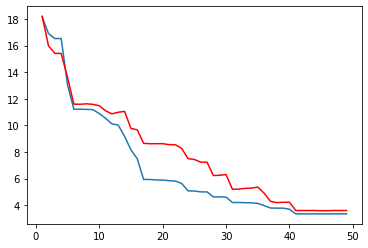

In [271]:
import matplotlib.pyplot as plt

plt.plot(times, mse_scores_train)
plt.plot(times, mse_scores_test,color='r')

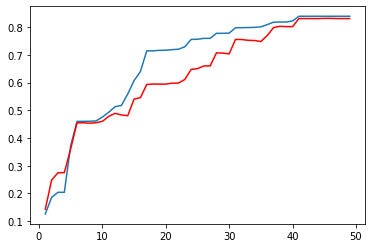

In [272]:
plt.plot(times, r2_scores_train)
plt.plot(times, r2_scores_test,color='r')

--> n_components = 43

# linear regression

In [285]:
pca = PCA(n_components = 43)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [286]:
slr = LinearRegression()

slr.fit(X_train_pca,y_train)
print(slr.coef_)

y_train_pred = slr.predict(X_train_pca)
y_test_pred = slr.predict(X_test_pca)

print('MSE train: %.3f, test: %.3f'%(
            mean_squared_error(y_train,y_train_pred),
            mean_squared_error(y_test,y_test_pred)))
print('R^2 train: %.3f, test: %.3f'%(
            r2_score(y_train,y_train_pred),
            r2_score(y_test,y_test_pred)))    

[-7.23303109e-01  5.92078494e-01  3.53591634e-01 -1.03462784e-02
 -1.11829403e+00 -8.52503155e-01 -1.73132565e-02 -5.76414966e-02
  1.08645955e-01  3.79415104e-01  4.41537498e-01  4.84176606e-01
  2.33082463e-01 -7.20205994e-01  8.09238286e-01  6.76578777e-01
  1.06157272e+00  3.32525535e-02  1.73931996e-01 -6.82317313e-02
  1.99488047e-01 -1.70579178e-01  4.10256092e-01 -7.58427263e-01
 -1.12198390e-01 -2.66497191e-01  6.44171963e-03 -6.90650968e-01
  3.26794071e-02  1.30411678e-01  7.49890900e-01  1.62749527e-02
  1.43526986e-01 -1.47805551e-01  2.81554760e-01 -5.97588964e-01
 -6.72892768e-01 -1.79450293e-01 -4.24730511e-02  6.29746176e-01
 -1.78454985e+00  1.35114495e+13  1.33687847e+13]
MSE train: 3.339, test: 3.595
R^2 train: 0.839, test: 0.831


In [287]:
slr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# ridge

In [288]:
# 調參

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse_scores_train = []
mse_scores_test = []
r2_scores_train = []
r2_scores_test = []
coef = []
times = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

for i in times:

#     pca = PCA(n_components = 43)
#     X_train_pca = pca.fit_transform(X_train_std)
#     X_test_pca = pca.transform(X_test_std)
    
    ridge = Ridge(alpha=i).fit(X_train,y_train) ## alpha = 1
    ridge.fit(X_train_pca,y_train)
#     print(ridge.coef_)
    coef.append(ridge.coef_)
    y_train_pred = ridge.predict(X_train_pca)
    y_test_pred = ridge.predict(X_test_pca)

    
    mse_scores_train.append(mean_squared_error(y_train,y_train_pred))
    mse_scores_test.append(mean_squared_error(y_test,y_test_pred))
    r2_scores_train.append(r2_score(y_train,y_train_pred))
    r2_scores_test.append(r2_score(y_test,y_test_pred))

In [289]:
times = [str(x) for x in times]

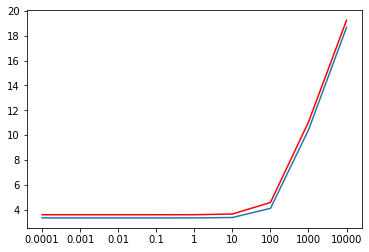

In [290]:
plt.plot(times, mse_scores_train)
plt.plot(times, mse_scores_test,color='r')

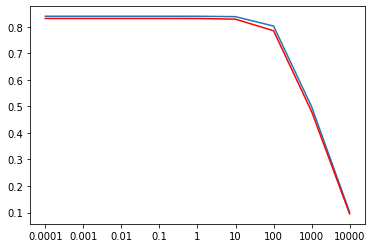

In [291]:
plt.plot(times, r2_scores_train)
plt.plot(times, r2_scores_test,color='r')

In [292]:
ridge = Ridge(alpha=1).fit(X_train,y_train) ## alpha = 1

ridge.fit(X_train_pca,y_train)
print(ridge.coef_)

y_train_pred = ridge.predict(X_train_pca)
y_test_pred = ridge.predict(X_test_pca)

print('MSE train: %.3f, test: %.3f'%(
            mean_squared_error(y_train,y_train_pred),
            mean_squared_error(y_test,y_test_pred)))
print('R^2 train: %.3f, test: %.3f'%(
            r2_score(y_train,y_train_pred),
            r2_score(y_test,y_test_pred)))    

[-7.22781136e-01  5.91473184e-01  3.53166326e-01 -1.03334937e-02
 -1.11684144e+00 -8.51280623e-01 -1.72872367e-02 -5.75525348e-02
  1.08452569e-01  3.78733825e-01  4.40670068e-01  4.83203209e-01
  2.32580106e-01 -7.18623851e-01  8.07332285e-01  6.74925417e-01
  1.05879147e+00  3.31619037e-02  1.73441653e-01 -6.80247543e-02
  1.98837902e-01 -1.70022373e-01  4.08886983e-01 -7.55589514e-01
 -1.11763969e-01 -2.65468089e-01  6.80536961e-03 -6.87494871e-01
  3.25672463e-02  1.29848702e-01  7.46162131e-01  1.61863353e-02
  1.42696781e-01 -1.46829081e-01  2.79547989e-01 -5.92946338e-01
 -6.66915192e-01 -1.77620369e-01 -4.19379512e-02  6.18730891e-01
 -1.72770876e+00  1.69372204e-14 -1.72682162e-15]
MSE train: 3.340, test: 3.597
R^2 train: 0.839, test: 0.831


In [293]:
ridge

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

# Lasso

In [294]:
# 調參

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse_scores_train = []
mse_scores_test = []
r2_scores_train = []
r2_scores_test = []
coef = []
times = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

for i in times:

#     pca = PCA(n_components = 43)
#     X_train_pca = pca.fit_transform(X_train_std)
#     X_test_pca = pca.transform(X_test_std)
    
    lasso = Lasso(alpha=i).fit(X_train,y_train)
    lasso.fit(X_train_pca,y_train)
#     print(lasso.coef_)
    coef.append(lasso.coef_)
    y_train_pred = lasso.predict(X_train_pca)
    y_test_pred = lasso.predict(X_test_pca)


#     print('MSE train: %.3f, test: %.3f'%(
#             mean_squared_error(y_train,y_train_pred),
#             mean_squared_error(y_test,y_test_pred)))
#     print('R^2 train: %.3f, test: %.3f'%(
#             r2_score(y_train,y_train_pred),
#             r2_score(y_test,y_test_pred)))
    
    mse_scores_train.append(mean_squared_error(y_train,y_train_pred))
    mse_scores_test.append(mean_squared_error(y_test,y_test_pred))
    r2_scores_train.append(r2_score(y_train,y_train_pred))
    r2_scores_test.append(r2_score(y_test,y_test_pred))

In [295]:
times = [str(x) for x in times]

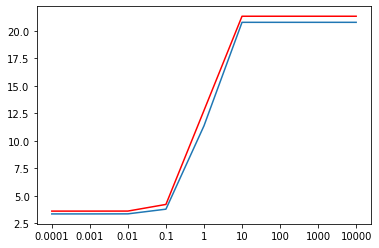

In [296]:
plt.plot(times, mse_scores_train)
plt.plot(times, mse_scores_test,color='r')

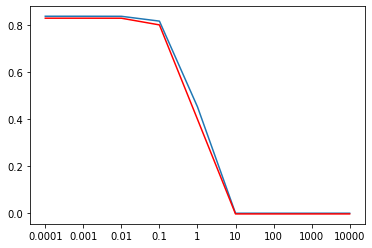

In [297]:
plt.plot(times, r2_scores_train)
plt.plot(times, r2_scores_test,color='r')

In [298]:
lasso = Lasso(alpha=0.01).fit(X_train,y_train)

lasso.fit(X_train_pca,y_train)
print(lasso.coef_)

y_train_pred = lasso.predict(X_train_pca)
y_test_pred = lasso.predict(X_test_pca)

print('MSE train: %.3f, test: %.3f'%(
            mean_squared_error(y_train,y_train_pred),
            mean_squared_error(y_test,y_test_pred)))
print('R^2 train: %.3f, test: %.3f'%(
            r2_score(y_train,y_train_pred),
            r2_score(y_test,y_test_pred)))    

[-7.21309912e-01  5.89253927e-01  3.50267845e-01 -6.93157345e-03
 -1.11470431e+00 -8.48539493e-01 -1.31590497e-02 -5.33752272e-02
  1.03724468e-01  3.74450320e-01  4.36104617e-01  4.78616673e-01
  2.27121060e-01 -7.14129496e-01  8.02722289e-01  6.69817666e-01
  1.05432275e+00  2.56635695e-02  1.66127807e-01 -5.98310350e-02
  1.90502048e-01 -1.61457513e-01  4.01001946e-01 -7.48052913e-01
 -1.01677224e-01 -2.55692203e-01  0.00000000e+00 -6.78025182e-01
  1.98378398e-02  1.17386668e-01  7.36090269e-01  1.23703443e-03
  1.27474333e-01 -1.29452291e-01  2.61741993e-01 -5.75978823e-01
 -6.48154825e-01 -1.51015548e-01 -7.25732365e-03  5.80609813e-01
 -1.69374669e+00  0.00000000e+00 -0.00000000e+00]
MSE train: 3.345, test: 3.598
R^2 train: 0.839, test: 0.831


In [299]:
lasso

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)